# Análise Exploratória do Corpora UlyssesNER-BR

In [1]:
import operator
import os
import random
import functools
import collections
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

random.seed(1999)

In [2]:
# DIR = "./dados-categorias/PLs/"  
DIR = "./dados-tipos/PLs/"  
# DIR = "./dados-categorias/STs/"
# DIR = "./dados-tipos/STs/"
# DIR = "./dados-tipos/Comentarios/"
# DIR = "./dados-categorias/Comentarios/"

In [3]:
all_files = [DIR+f for f in os.listdir(DIR)]  # Lista todos os arquivos do "DIR"
all_files[:10]

['./dados-tipos/PLs/EQUIPE2-DIA4-PL-989-2015_corrigido.conll',
 './dados-tipos/PLs/EQUIPE1-DIA4-PL-6969-2017_corrigido.conll',
 './dados-tipos/PLs/EQUIPE1-DIA4-PL-4786-2019_corrigido.conll',
 './dados-tipos/PLs/EQUIPE1-DIA5-PL-822-2011_corrigido.conll',
 './dados-tipos/PLs/EQUIPE2-DIA3-PL-4851-2019_corrigido.conll',
 './dados-tipos/PLs/EQUIPE2-DIA1-PL-743-2011_corrigido.conll',
 './dados-tipos/PLs/EQUIPE2-DIA2-PL-721-2011_corrigido.conll',
 './dados-tipos/PLs/EQUIPE2-DIA2-PL-666-2011_corrigido.conll',
 './dados-tipos/PLs/EQUIPE2-DIA4-PL-4768-2019_corrigido.conll',
 './dados-tipos/PLs/EQUIPE1-DIA2-PL-5919-2013_corrigido.conll']

In [4]:
def process_conll_file(location:str)->list:
    with open(location, "r") as f:
        data = f.read()
    data = data.split("\n\n")
    data = list(map(lambda x:x.split("\n"), data))
    data.pop()
    data = list(map(lambda x:[operator.itemgetter(*[0, -1])(y.split(" ")) for y in x], data))
    return data

def combine_files(locations:list)->list:
    extended = []
    for f in locations:
        extended.extend(process_conll_file(f))
    return extended

In [5]:
all_data = combine_files(all_files)  # Agrega as sentenças de todos os arquivos do DIR num unico conjunto
random.shuffle(all_data)

In [6]:
def to_list(data:list)->list:
    return functools.reduce(operator.iconcat, data, [])

def split_words_n_tags(data:list)->tuple:
    words, tags = map(list, zip(*data))
    return words, tags

## Estatísticas

In [7]:
f"Número Total de Sentenças: {len(all_data)}"

'Número Total de Sentenças: 9526'

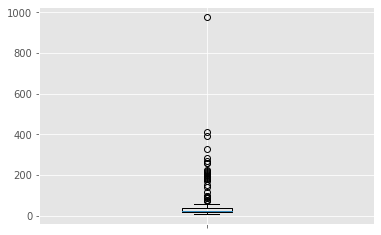

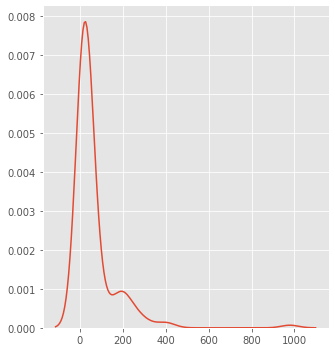

Número Médio de Sentenças por Projeto de Lei: 63.50666666666667
Intervalo de Confiança (alpha = 5%): (46.151282646472396, 80.86205068686094)


In [8]:
# PL's são compostos de múltiplas sentenças, por isso a análise de sentenças é feita só para este corpus
if DIR=="./dados-categorias/PLs/" or DIR=="./dados-tipos/PLs/":
    # Análise do número de sentenças por projeto de lei
    tamanhos_pl = []
    for f in all_files:
        d = process_conll_file(f)
        tamanhos_pl.append(len(d))
    plt.boxplot(tamanhos_pl, labels=[""])
    plt.show()

    g = sns.displot(tamanhos_pl, kind="kde")
    g.set(ylabel=None)
    plt.show()
    # Estimação pontual do tamanho médio de uma sentença de um projeto de lei
    media_pl = np.mean(tamanhos_pl)
    std_pl = np.std(tamanhos_pl)
    z_alpha = 1.96
    rng = (z_alpha * std_pl) / np.sqrt(len(tamanhos_pl))
    print(f"Número Médio de Sentenças por Projeto de Lei: {media_pl}")
    print(f"Intervalo de Confiança (alpha = 5%): {(media_pl-rng, media_pl+rng)}")
else:
    None

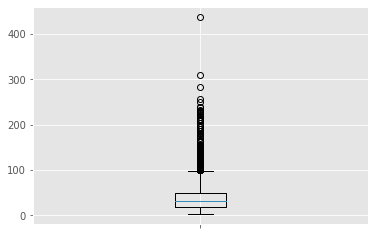

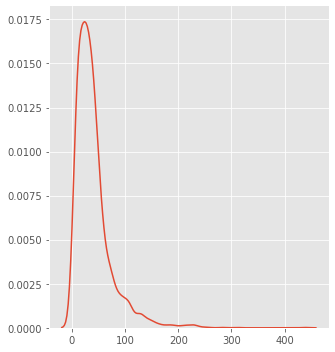

Número Médio de Tokens por sentença: 40.43088190418065
Intervalo de Confiança (alpha = 5%): (39.22610829017477, 41.63565551818653)


In [9]:
# Análise do número de tokens por sentenças
tamanhos_sent = []
for d in all_data:
    if len(d)>1:
        tamanhos_sent.append(len(d))
plt.boxplot(tamanhos_sent, labels=[""])
plt.show()

g = sns.displot(tamanhos_sent, kind="kde")
g.set(ylabel=None)
plt.show()

# Estimação pontual do número médio de tokens por sentença
media_sent = np.mean(tamanhos_sent)
std_sent = np.std(tamanhos_sent)
z_alpha = 1.96
rng = (z_alpha * std_sent) / np.sqrt(len(tamanhos_sent))
print(f"Número Médio de Tokens por sentença: {media_sent}")
print(f"Intervalo de Confiança (alpha = 5%): {(media_sent-rng, media_sent+rng)}")

In [10]:
all_pairs = to_list(all_data)
all_words, all_tags = split_words_n_tags(all_pairs)

In [11]:
f"Número de tokens no corpus: {len(all_words)}"

'Número de tokens no corpus: 138741'

In [12]:
f"Tamanho do Vocabulário: {len(set(all_words))}"

'Tamanho do Vocabulário: 11833'

In [13]:
# Daqui para cima não há diferença entre categorias e tipos

In [14]:
# Remoção dos prefixos B- e I- das tags
all_tags_limpo = []
for tag in all_tags:
    if tag=="O":
        all_tags_limpo.append(tag)
    elif tag.startswith("B-") or tag.startswith("I-"):
        all_tags_limpo.append(tag[2:])
    else:
        continue

In [15]:
f"Número de Tags: {len(set(all_tags_limpo))}"

'Número de Tags: 17'

In [20]:
# Número absoluto de aparições de cada tag no corpus
tag_hist = collections.Counter(all_tags_limpo)

# Adiciona tags inexistentes no caso dos PLs e STs
if DIR=="./dados-tipos/PLs/":
    tag_hist["PESSOAgrupoind"] = 0
    tag_hist["FUNDsolicitacaotrabalho"] = 0
elif DIR=="./dados-tipos/STs/":
    tag_hist["PESSOAgrupoind"] = 0
tag_hist

Counter({'O': 124617,
         'DATA': 979,
         'ORGgovernamental': 1449,
         'PRODUTOoutros': 1213,
         'FUNDlei': 5935,
         'LOCALconcreto': 909,
         'PESSOAcargo': 392,
         'PESSOAindividual': 868,
         'ORGpartido': 42,
         'PRODUTOsistema': 109,
         'FUNDapelido': 678,
         'PESSOAgrupocargo': 248,
         'ORGnaogovernamental': 398,
         'LOCALvirtual': 483,
         'FUNDprojetodelei': 106,
         'PRODUTOprograma': 241,
         'EVENTO': 74,
         'PESSOAgrupoind': 0,
         'FUNDsolicitacaotrabalho': 0})

In [21]:
# Estimação pontual das proporções de cada uma das tags (em latex)
prop = {key:(val/sum(tag_hist.values())) * 100 for key, val in tag_hist.items()}
prop = dict(sorted(prop.items(), key=lambda item: item[1]))
for key, val in prop.items():
    print(f"{key} & {val:.2f}\%\\\\ \hline")
    
eps = z_alpha * np.sqrt(1/(4*len(all_words)))
print(f"\n\nErro ao estimar a proporção (abordagem conservativa, alpha = 5%): {(eps * 100):.2f}%")

PESSOAgrupoind & 0.00\%\\ \hline
FUNDsolicitacaotrabalho & 0.00\%\\ \hline
ORGpartido & 0.03\%\\ \hline
EVENTO & 0.05\%\\ \hline
FUNDprojetodelei & 0.08\%\\ \hline
PRODUTOsistema & 0.08\%\\ \hline
PRODUTOprograma & 0.17\%\\ \hline
PESSOAgrupocargo & 0.18\%\\ \hline
PESSOAcargo & 0.28\%\\ \hline
ORGnaogovernamental & 0.29\%\\ \hline
LOCALvirtual & 0.35\%\\ \hline
FUNDapelido & 0.49\%\\ \hline
PESSOAindividual & 0.63\%\\ \hline
LOCALconcreto & 0.66\%\\ \hline
DATA & 0.71\%\\ \hline
PRODUTOoutros & 0.87\%\\ \hline
ORGgovernamental & 1.04\%\\ \hline
FUNDlei & 4.28\%\\ \hline
O & 89.82\%\\ \hline


Erro ao estimar a proporção (abordagem conservativa, alpha = 5%): 0.26%


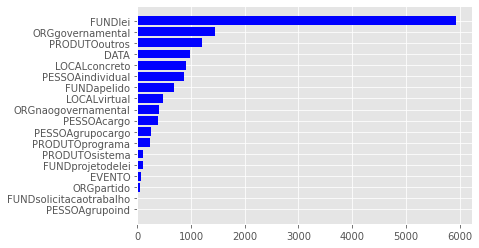

In [22]:
# Plot do número absoluto de aparições de cada uma das tags
tag_hist.pop("O")
tag_hist = dict(sorted(tag_hist.items(), key=lambda item: item[1]))
keys = tag_hist.keys()
vals = tag_hist.values()

fig, ax = plt.subplots()
ax.barh(range(len(keys)), tag_hist.values(), color="blue")
ax.set_yticks(range(len(keys)))
ax.set_yticklabels(keys)
plt.show()